In [1]:
!pip install pdfminer.six
!pip install docx2txt
!pip install urlextract
!pip install gender_guesser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 5.0 MB/s 
     |████████████████████████████████| 4.0 MB 44.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=d74d7ef7a061dffaa2a9c22d7a979b135ad8188e0565e7853039eaa665652d94
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 379 kB 5.1 MB/s 


In [2]:
from pdfminer.high_level import extract_text
import docx2txt
from urlextract import URLExtract


import gender_guesser.detector as gender
import os
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import random
import requests
import urllib.request 
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import string

import nltk
from nltk.corpus import names, stopwords
import spacy

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('names')
nltk.download('wordnet')
nltk.download('omw-1.4')


# load pre-trained model
nlp = spacy.load('en_core_web_sm')
# Grad all general stop words
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
#EMAIL_REG = re.compile(r'[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+')
EMAIL_REG = r'[\w.+-]+@[\w-]+\.[\w.-]+'
PHONE_REG = re.compile(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]')
LINKEDON_URL_REGEX = r'(linkedin.com/in/\S+)'
URL_REGEX = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
ZIP_CODE_REGEX = r'\b\d{5}(?:[-\s]\d{4})?\b'
    
# you may read the database from a csv file or some other database
# skill extracted from job describtion
SKILLS_DB = [
    'python', 'c','r', 'c++','java','hadoop','scala','flask','pandas','spark','scikit-learn',
    'numpy','php','sql','mysql','css','mongdb','nltk','fastai' , 'keras', 'pytorch','tensorflow',
    'linux','Ruby','JavaScript','django','react','reactjs','ai','ui','tableau'
]

# Grad all general stop words
STOPWORDS = set(stopwords.words('english'))

In [4]:
EDUCATION_DEGREES_1 = pd.read_html("https://www.mc.edu/offices/marketing/branding/editorial-style-guide/abbreviations")[0]
EDUCATION_DEGREES_1 = EDUCATION_DEGREES_1.iloc[1: , :] # remove first row
EDUCATION_DEGREES_1.rename(columns={0: 'Degree', 1: 'Abbreviation'}, inplace=True)
EDUCATION_DEGREES_1 = EDUCATION_DEGREES_1.Abbreviation.apply(lambda abbv: re.sub(r'[?|$|.|!|,]', r'', abbv)).tolist()
EDUCATION_DEGREES_1

['BA',
 'BFA',
 'BS',
 'BSBA',
 'BSEd',
 'BSN',
 'BSW',
 'MA',
 'MAT',
 'MBA',
 'MCS',
 'MEd',
 'MFA',
 'MHSA',
 'MLS',
 'MMus',
 'MSM',
 'MSS',
 'MS',
 'EdD',
 'DPC',
 'EdS']

In [5]:
URL = "https://abbreviations.yourdictionary.com/articles/degree-abbreviations.html"
r = requests.get(URL)
soup = BeautifulSoup(r.content, "html.parser") 

sections = soup.findAll('section', attrs = {'class':'article-body'}) 
len(sections)

EDUCATION_DEGREES_2 = {}

def removesuffix(string, suffix):
    if string.endswith(suffix):
        return string[:-len(suffix)]
    return string

def li_tag_stripe(li_tag, split_at):
    li_tag = li_tag.text.strip().split(split_at)
    abbv, degree = li_tag
    #abbv = abbv.removesuffix(' - ') # removesuffix is a 3.9+ method in str
    abbv = removesuffix(abbv, ' - ') 
    abbv = re.sub(r'[?|$|.|!|,]', r'', abbv)
    two_abbv = abbv.split(' or ')
    if len(two_abbv) > 1: 
        for ab in two_abbv:
            EDUCATION_DEGREES_2[ab] = split_at + degree

    if len(two_abbv) == 1:
        EDUCATION_DEGREES_2[abbv] = split_at + degree

for li_tag in sections[4].findAll('li'):
    li_tag_stripe(li_tag=li_tag, split_at='Associate')
    

for li_tag in sections[5].findAll('li'):
    li_tag_stripe(li_tag=li_tag, split_at='Bach')

#pd.DataFrame(EDUCATION_DEGREES.items()).head()
EDUCATION_DEGREES_2 = list(EDUCATION_DEGREES_2.keys())
EDUCATION_DEGREES = list(set(EDUCATION_DEGREES_1 + EDUCATION_DEGREES_2))

# save
EDUCATION_DEGREES

['BLA',
 'BMEd',
 'MAT',
 'MHSA',
 'BURP',
 'BAcy',
 'BSET',
 'BSc(IT)',
 'BA(Econ)',
 'SB',
 'EdS',
 'BPhil',
 'MSS',
 'BSocSc',
 'BAM',
 'BSEng',
 'AE',
 'BPAPM',
 'BSMicr',
 'BMus',
 'APT',
 'BAPSY',
 'ABA',
 'BSW',
 'BAT',
 'BAE',
 'BAJ',
 'BCA',
 'AAS',
 'AAT',
 'BDes',
 'BKin',
 'AEET',
 'AA',
 'BIS',
 'BSAE',
 'BCom',
 'BLArch',
 'BGS',
 'BTS',
 'BSc(Econ)',
 'MEd',
 'BMathSc',
 'AB',
 'BSCS',
 'BA',
 'BLIS',
 'AAA',
 'BABA',
 'BAvn',
 'BSN',
 'BLS',
 'BAg',
 'BComp',
 'MCS',
 'BHS',
 'BSE',
 'MBA',
 'ABS',
 'BS',
 'BEcon',
 'BSChem',
 'BBIS',
 'MMus',
 'AEngT',
 'AA-T',
 'MLS',
 'BCompt',
 'BCompSc',
 'BM',
 'BF&TV',
 'BPlan',
 'BTech',
 'BIBE',
 'BEng',
 'BFA',
 'AT',
 'APE',
 'BACom',
 'BAcc',
 'MFA',
 'BASc',
 'BCE',
 'BSF',
 'BSPH',
 'BInDsn',
 'BCJ',
 'AF',
 'BAccSci',
 'BSME',
 'BHSc',
 'APS',
 'BEE',
 'AS',
 'BSc(Psych)',
 'AOS ',
 'BSc - Intercalculated ',
 'AFA',
 'BArch',
 'MA',
 'BSGS',
 'BScKin',
 'EdD',
 'BBusSc',
 'AAB',
 'BPS',
 'AIT',
 'BAS',
 'BCrim ',
 'BAMus'

In [6]:
#!wget https://github.com/OmkarPathak/ResumeParser/blob/master/resume_parser/resume_parser/skills.csv

Download some resemes

In [7]:
#resemes_url = 'https://www.beamjobs.com/resumes/data-science-resume-example-guide'
resemes_url = 'https://www.beamjobs.com/resumes/data-engineer-resume-examples'

r = requests.get(resemes_url)
soup = BeautifulSoup(r.content, "html.parser") 

urls = soup.findAll('a', attrs = {'class':'d-block mx-auto'}, href=True)
print(len(urls))

for url in urls:
    print( url['href'] )
    urllib.request.urlretrieve(
        url['href'], 
        os.path.basename(url['href'])
    )

13
https://d25zcttzf44i59.cloudfront.net/data-engineer-resume-example.pdf
https://d25zcttzf44i59.cloudfront.net/big-data-engineer-resume-example.pdf
https://d25zcttzf44i59.cloudfront.net/entrylevel-data-engineer-resume-example.pdf
https://d25zcttzf44i59.cloudfront.net/senior-data-engineer-resume-example.pdf
https://d25zcttzf44i59.cloudfront.net/senior-business-intelligence-data-engineer-resume-example.pdf
https://d25zcttzf44i59.cloudfront.net/mid-level-data-engineer-resume-example.pdf
https://d25zcttzf44i59.cloudfront.net/power-and-performance-data-engineer-resume-example.pdf
https://d25zcttzf44i59.cloudfront.net/data-engineer-analyst-resume-example.pdf
https://d25zcttzf44i59.cloudfront.net/computer-vision-data-engineer-resume-example.pdf
https://d25zcttzf44i59.cloudfront.net/remote-data-engineer-resume-example.pdf
https://d25zcttzf44i59.cloudfront.net/data-and-platform-engineer-resume-example.pdf
https://d25zcttzf44i59.cloudfront.net/data-analytics-engineer-resume-example.pdf
https://

In [8]:
DIR = "/content"
PDF_PATH = DIR + "/data-engineer-resume-example.pdf"
SKILS_PATH = DIR + "/skills.csv"

In [9]:
os.path.splitext(PDF_PATH)[1]

'.pdf'

In [10]:
#skills_df = pd.read_csv(SKILS_PATH)
#skills_df

In [11]:
#from IPython.display import IFrame
#IFrame("d25zcttzf44i59.cloudfront.net/entry-level-data-scientist-resume-example.pdf", width=1000, height=600)
#IFrame(PDF_PATH, width=1000, height=600)

In [12]:
data = {}

# pdf to text

In [13]:
def extract_text_from_pdf(pdf_path):
    print(pdf_path)
    return extract_text(pdf_path)
 
#resume_text = extract_text_from_pdf('../data/interim/b.pdf')
resume_text = extract_text_from_pdf(PDF_PATH)
#resume_text

/content/data-engineer-resume-example.pdf


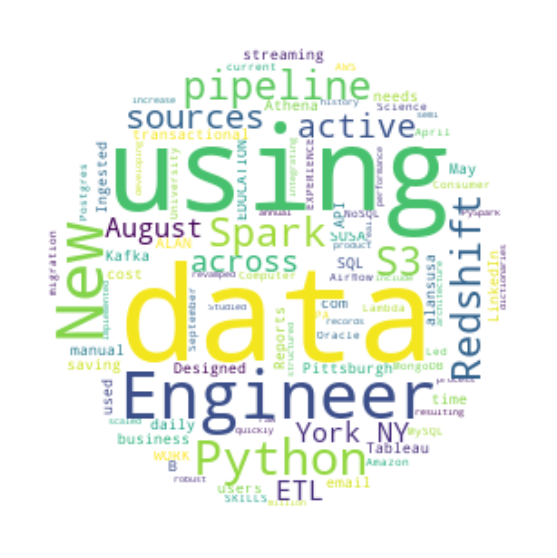

In [14]:
def show_words(text):
    stopwords = set(STOPWORDS)

    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    #plt.imshow(mask, interpolation="bilinear")

    wc = WordCloud(
        stopwords = stopwords,
        background_color = "white", 
        repeat = True, 
        mask = mask
    ).generate(text)

    plt.figure(figsize = (14, 10), facecolor = None)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

show_words(resume_text)

# docx to text 

In [15]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

#text_docx = extract_text_from_docx('../data/interim/resume.docx')
#text_docx

# Extract Names

In [16]:
def extract_person_names(text):
    sentences = nltk.sent_tokenize(text)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    full_name = []

    for item in sentences[0]:
        # convert tuple to list
        item_list = list(item)

        # Search consecutive Proper Noun
        if 'NNP' in item_list and (item_list[0].istitle() or str(item_list[0]).isupper()):
            full_name.append(item_list[0])

    return ' '.join(full_name[:2])

data['Name'] = extract_person_names(resume_text)
data['Name']

'ALAN SUSA'

In [17]:
spacy_parser = nlp(resume_text)

#for entity in spacy_parser.ents: print(f'-- Found: {entity.text} of type: {entity.label_}')
persons = [parser.text for parser in spacy_parser.ents if parser.label_ == 'PERSON']
PERSON_NAME = persons[0].split('\n')[0]
PERSON_NAME 

'ALAN SUSA'

# Extract Email

In [18]:
EMAIL_REG = re.compile(r'[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+')
EMAIL_REG = r'[\w.+-]+@[\w-]+\.[\w.-]+'

def extract_emails(resume_text):
    email = re.findall(EMAIL_REG, resume_text)
    if email:
        email = ''.join(email[0])
        if resume_text.find(email) and len(email):
            return email

data['email'] = extract_emails(resume_text)
data['email']

'alansusa@email.com'

# Extract Phone Number

In [19]:
PHONE_REG = re.compile(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]')

def extract_phones(resume_text):
    phone = re.findall(PHONE_REG, resume_text)
    if phone:
        number = ''.join(phone[0])
        number = number.replace(" ", "")
        if resume_text.find(number) and len(number):
            return number
    return None

data['phone'] = extract_phones(resume_text)
data['phone']

'(123)456-7890'

# Extract Links

In [20]:
LINKEDON_URL_REGEX = r'(linkedin.com/in/\S+)'

def extract_linkedin(resume_text):
    urls = re.findall(LINKEDON_URL_REGEX, resume_text)
    if urls:
        return list(set(urls))[0]
    return  None

data['linkedin'] = extract_linkedin(resume_text)
data['linkedin']

In [21]:
URL_REGEX = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""

def extract_links(resume_text):
    urls = re.findall(URL_REGEX, resume_text)
    if urls:
        return list(set(urls))[0]
    return  None

data['links'] = extract_links(resume_text)
data['links']

[]

In [22]:
def extract_links(resume_text):
    extractor = URLExtract()
    urls = extractor.find_urls(resume_text)
    return list(set(urls)) if urls else None

extract_links(resume_text)

# Extract Sex

In [23]:
def extract_gender(text):  
    gender = re.findall(r'\b(gentleman|man|male|female|woman|girl)\b', resume_text) # 'fff male female')
    if gender:
        gender = gender[0]
        print(gender)

        gender_dict = {"male": ["gentleman", "man", "male"],
                    "female": ["female", "woman", "girl"]}
        gender_aux = []
        if gender in gender_dict['male']: gender_aux.append('male')
        elif gender in gender_dict['female']: gender_aux.append('female')
                
        return gender_aux[0]

    else:
        return None

data['gender'] = extract_gender(resume_text)
data['gender']

Predict gender by first name

In [24]:
def predict_gender(name):
    """ Predict gender by first name """
    d = gender.Detector(case_sensitive=False)
    return d.get_gender(name)

gender = predict_gender(data['Name'].split(' ')[0])
gender

'male'

# Extract zip_code

In [25]:
ZIP_CODE_REGEX = r'\b\d{5}(?:[-\s]\d{4})?\b'

def extract_zip_code(resume_text):
    zip = re.findall(ZIP_CODE_REGEX, resume_text)
    return list(set(zip))[0] if zip else None

data['zip_code'] = extract_zip_code(resume_text)
data['zip_code']

# Extract Skills

In [26]:
def extract_skills(input_text):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    word_tokens = nltk.tokenize.word_tokenize(input_text)

    # remove the stop words and remove the punctuation
    filtered_tokens = [token for token in word_tokens if token not in stop_words and token.isalpha()]

    # generate bigrams and trigrams (such as machine learning)
    bigrams_trigrams = list(
        map(' '.join, nltk.everygrams(filtered_tokens, 2, 3))
    )

    # we create a set to keep the results in.
    found_skills = set()

    # we search for each token in our skills database
    for token in filtered_tokens:
        if token.lower() in SKILLS_DB:
            #print(token)
            found_skills.add(token)

    # we search for each bigram and trigram in our skills database
    for ngram in bigrams_trigrams:
        if ngram.lower() in SKILLS_DB:
            #print(ngram)
            found_skills.add(ngram)

    return list(found_skills)

data['skills'] = extract_skills(resume_text)
data['skills']

['MySQL', 'Spark', 'SQL', 'Python', 'Tableau']

# Education

In [27]:
def extract_education(text):
    education = {}

    nlp_text = nlp(text)
    nlp_text = [sent.text.strip() for sent in nlp_text.sents] # Sentence Tokenizer

    # Extract education degree
    for index, text in enumerate(nlp_text):
        for t in text.split():
            # Replace all special symbols
            t = re.sub(r'[?|$|.|!|,]', r'', t)
            if t.upper() in EDUCATION_DEGREES and t not in STOPWORDS:
                #education[t] = text + nlp_text[index + 1]
                education[t] = text

    return education #list(education.keys())

extract_education(resume_text)

{'BA': 'ALAN SUSA\nData Engineer\nalansusa@email.com\n\nLinkedIn\n\n(123) 456-7890\n\nNew York, NY\n\nEDUCATION\nB.A.\nComputer Science\nUniversity of Pittsburgh\n\nSeptember 2010 - April 2014\n\nPittsburgh, PA\n\nSKILLS\nPython\nETLs\nSQL (Postgres, Redshift, MySQL)\nNoSQL (MongoDB)\nSpark, Kafka\nAirﬂow\nAWS (Athena, Lambda, S3)\n\nWORK EXPERIENCE\n\nData Engineer\nConsumer Reports\nMay 2018 - current\n\nNew York, NY\n\nLed the migration from Oracle to Redshift using Amazon Athena\nand S3, resulting in an annual cost savings of $678,000 and an\nincrease in performance of 14%\nDesigned and implemented a real-time data pipeline to process\nsemi-structured data by integrating 150 million raw records\nfrom 30+ data sources using Kafka and PySpark\nDesigned the data pipeline architecture for a new product that\nquickly scaled from 0 to 125,000 daily active users\nStudied and revamped data dictionaries to include a more\nrobust history for developing consistency across domain\n\nData Engin

In [28]:
def extract_education(text):
    education = {}

    nlp_text = nlp(text)
    nlp_text = [sent.text.strip() for sent in nlp_text.sents] # Sentence Tokenizer
    # Splitting on the basis of newlines
    text = [el.strip() for el in text.split("\n") if len(el) > 0]   
    # Tokenize the individual lines
    text = [nltk.word_tokenize(el) for el in text]    

    # Extract education degree
    for index, text in enumerate(text):
        for t in text:
            t = re.sub(r'[?|$|.|!|,]', r'', t)
            # Replace all special symbols
            if t.upper() in EDUCATION_DEGREES and t not in STOPWORDS:
                text = ' '.join(text)
                text = re.sub(r'[?|$|.|!|,]', r'', text)
                education[t] = text

    return education #list(education.keys())

data['education'] = extract_education(resume_text)
data['education']

{'BA': 'BA '}

# Extract Experience

In [29]:
from nltk.stem import WordNetLemmatizer

def extract_experience(resume_text):
    '''
    Helper function to extract experience from resume text
    :param resume_text: Plain resume text
    :return: list of experience
    '''
    wordnet_lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # word tokenization 
    word_tokens = nltk.word_tokenize(resume_text)

    # remove stop words and lemmatize  
    filtered_sentence = [w for w in word_tokens if not w in stop_words and wordnet_lemmatizer.lemmatize(w) not in stop_words] 
    sent = nltk.pos_tag(filtered_sentence)

    # parse regex
    cp = nltk.RegexpParser('P: {<NNP>+}')
    cs = cp.parse(sent)
    
    # for i in cs.subtrees(filter=lambda x: x.label() == 'P'):
    #     print(i)
    
    test = []
    
    for vp in list(cs.subtrees(filter=lambda x: x.label()=='P')):
        test.append(" ".join([i[0] for i in vp.leaves() if len(vp.leaves()) >= 2]))

    # Search the word 'experience' in the chunk and then print out the text after it
    x = [x[x.lower().index('experience') + 10:] for i, x in enumerate(test) if x and 'experience' in x.lower()]
    return 

EXPERIENCES = extract_experience(resume_text)

# Pipeline

In [30]:
data

{'Name': 'ALAN SUSA',
 'email': 'alansusa@email.com',
 'phone': '(123)456-7890',
 'linkedin': None,
 'links': [],
 'gender': None,
 'zip_code': None,
 'skills': ['MySQL', 'Spark', 'SQL', 'Python', 'Tableau'],
 'education': {'BA': 'BA '}}

In [31]:
class ResumeParser(object):
    def __init__(self, path=''):
        self.path = path
        self.reseme_text = None

    @property
    def parse(self):
        file_extension = os.path.splitext(PDF_PATH)[1]

        if file_extension == '.docx':
            self.reseme_text = self.extract_text_from_docx()
        elif file_extension == '.pdf':
            self.reseme_text = self.extract_text_from_pdf()
        else:
            print('pdf or docx file')

        return {
            'Name': self.extract_name,
            'Email': self.extract_emails,
            'Phone': self.extract_phones,
            'Linkedin': self.extract_linkedin,
            'Links': self.extract_links,
            'Gender': self.extract_gender,
            'Zip Code': self.extract_zip_code,
            'ٍSkills': self.extract_skills,
            'Education': self.extract_education
        }

    def extract_text_from_docx(self):
        txt = docx2txt.process(self.path)
        if txt:
            return txt.replace('\t', ' ')
        return None
        
    def extract_text_from_pdf(self):
        return extract_text(self.path)
        
    @property
    def extract_name(self):
        sentences = nltk.sent_tokenize(self.reseme_text)
        sentences = [nltk.word_tokenize(sent) for sent in sentences]
        sentences = [nltk.pos_tag(sent) for sent in sentences]
        full_name = []

        for item in sentences[0]:
            # convert tuple to list
            item_list = list(item)

            # Search consecutive Proper Noun
            if 'NNP' in item_list and (item_list[0].istitle() or str(item_list[0]).isupper()):
                full_name.append(item_list[0])

        return ' '.join(full_name[:3])
    @property
    def extract_emails(self):
        email = re.findall(EMAIL_REG, self.reseme_text)
        if email:
            email = ''.join(email[0])
            if resume_text.find(email) and len(email):
                return email
    @property
    def extract_phones(self):
        phone = re.findall(PHONE_REG, self.reseme_text)
        if phone:
            number = ''.join(phone[0])
            number = number.replace(" ", "")
            if self.reseme_text.find(number) and len(number):
                return number
        return None

    @property
    def extract_linkedin(self):
        urls = re.findall(LINKEDON_URL_REGEX, self.reseme_text)
        return list(set(urls))[0] if urls else None

    @property
    def extract_links(self):
        urls = re.findall(URL_REGEX, self.reseme_text)
        return list(set(urls))

    @property
    def extract_gender(self):  
        gender = re.findall(r'\b(gentleman|man|male|female|woman|girl)\b', self.reseme_text) # 'fff male female')
        if gender:
            gender = gender[0]
            print(gender)

            gender_dict = {"male": ["gentleman", "man", "male"],
                        "female": ["female", "woman", "girl"]}
            gender_aux = []
            if gender in gender_dict['male']: gender_aux.append('male')
            elif gender in gender_dict['female']: gender_aux.append('female')
                    
            return gender_aux[0]

        else:
            return None

    @property
    def extract_zip_code(self):
        zip = re.findall(ZIP_CODE_REGEX, self.reseme_text)
        return list(set(zip))[0] if zip else None

    @property
    def extract_skills(self):
        stop_words = set(nltk.corpus.stopwords.words('english'))
        word_tokens = nltk.tokenize.word_tokenize(self.reseme_text)

        # remove the stop words and remove the punctuation
        filtered_tokens = [token for token in word_tokens if token not in stop_words and token.isalpha()]

        # generate bigrams and trigrams (such as machine learning)
        bigrams_trigrams = list(
            map(' '.join, nltk.everygrams(filtered_tokens, 2, 3))
        )

        # we create a set to keep the results in.
        found_skills = set()

        # we search for each token in our skills database
        for token in filtered_tokens:
            if token.lower() in SKILLS_DB:
                #print(token)
                found_skills.add(token)

        # we search for each bigram and trigram in our skills database
        for ngram in bigrams_trigrams:
            if ngram.lower() in SKILLS_DB:
                #print(ngram)
                found_skills.add(ngram)

        return list(found_skills)

    @property
    def extract_education(self):
        education = {}
        # Splitting on the basis of newlines
        text = [el.strip() for el in self.reseme_text.split("\n") if len(el) > 0]   
        # Tokenize the individual lines
        text = [nltk.word_tokenize(el) for el in text]    
        # Extract education degree
        for index, text in enumerate(text):
            for t in text:
                t = re.sub(r'[?|$|.|!|,]', r'', t)
                # Replace all special symbols
                if t.upper() in EDUCATION_DEGREES and t not in STOPWORDS:
                    text = ' '.join(text)
                    text = re.sub(r'[?|$|.|!|,]', r'', text)
                    education[t] = text
        return education 

data = ResumeParser(PDF_PATH)
data.parse

{'Name': 'ALAN SUSA Data',
 'Email': 'alansusa@email.com',
 'Phone': '(123)456-7890',
 'Linkedin': None,
 'Links': [],
 'Gender': None,
 'Zip Code': None,
 'ٍSkills': ['MySQL', 'Spark', 'SQL', 'Python', 'Tableau'],
 'Education': {'BA': 'BA '}}

In [32]:
## try diffrent resemes
import glob

for file_path in glob.glob('*.pdf'):
    data = ResumeParser(file_path)
    print( data.parse )

{'Name': 'J U DA', 'Email': 'jberger@email.com', 'Phone': '(123)456-7890', 'Linkedin': 'linkedin.com/in/judah-berg', 'Links': ['linkedin.com/in/judah-berg'], 'Gender': None, 'Zip Code': None, 'ٍSkills': ['R', 'Python', 'Tableau', 'SQL'], 'Education': {'BS': 'BS '}}
{'Name': 'STEFAN BUCHHOLZ Data', 'Email': 'stefan.buchholz@email.com', 'Phone': '(123)456-7890', 'Linkedin': None, 'Links': [], 'Gender': None, 'Zip Code': None, 'ٍSkills': ['R', 'TensorFlow', 'Numpy', 'SQL', 'Python'], 'Education': {}}
{'Name': 'BRANDON CONNOR Data', 'Email': 'brandonconnor@email.com', 'Phone': '(123)456-7890', 'Linkedin': None, 'Links': [], 'Gender': None, 'Zip Code': None, 'ٍSkills': ['Tableau', 'Python', 'Spark', 'SQL'], 'Education': {'BS': 'BS '}}
{'Name': 'Josephine Arriaga Senior', 'Email': 'josephinear@email.com', 'Phone': '(123)456-7890', 'Linkedin': None, 'Links': [], 'Gender': None, 'Zip Code': None, 'ٍSkills': ['MySQL', 'SQL', 'Java', 'Python', 'Tableau'], 'Education': {}}
{'Name': 'Kassandra Mor